## Problem 1

In [377]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import linregress
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

colors = ['#43009a', '#a0475e', '#ff8200']

In [80]:
def build_hierarchical_network(n):
    
    G = nx.Graph()
    
    central_node = 0
    peripheral_nodes = [1, 2, 3, 4]
    
    all_nodes = [central_node] + peripheral_nodes
    for node in all_nodes:
        G.add_node(node)
    
    for i, node_i in enumerate(all_nodes):
        for node_j in all_nodes[i+1:]:
            G.add_edge(node_i, node_j)
    
    if n == 1:
        return G
    
    node_counter = 5
    
    for iteration in range(2, n + 1):
        
        previous_G = G.copy()

        previous_nodes = list(previous_G.nodes())
        
        previous_peripheral = peripheral_nodes.copy()
        
        new_all_peripheral = []
        
        for copy_idx in range(4):
            
            node_mapping = {}
            for old_node in previous_nodes:
                node_mapping[old_node] = node_counter
                node_counter += 1
            
            for old_node in previous_nodes:
                new_node = node_mapping[old_node]
                G.add_node(new_node)
            
            for edge in previous_G.edges():
                new_edge = (node_mapping[edge[0]], node_mapping[edge[1]])
                G.add_edge(new_edge[0], new_edge[1])
            
            # Connect the NEW peripheral nodes (from previous iteration) to the ORIGINAL central node
            new_peripheral = [node_mapping[p] for p in previous_peripheral]
            for pnode in new_peripheral:
                G.add_edge(central_node, pnode)
            
            new_all_peripheral.extend(new_peripheral)
        
        peripheral_nodes = new_all_peripheral
    
    return G


n_level = 6

G = build_hierarchical_network(n_level)


In [81]:
degree_sequence = [degree for node, degree in G.degree()]
degree_count = {}
for degree in degree_sequence:
    degree_count[degree] = degree_count.get(degree, 0) + 1

total_nodes = len(degree_sequence)
degrees = sorted(degree_count.keys())
probabilities = [degree_count[degree] / total_nodes for degree in degrees]

In [116]:
fit_indices = list(range(6, len(degrees)))
k_fit = np.array([degrees[i] for i in fit_indices], dtype=float)
p_fit = np.array([probabilities[i] for i in fit_indices], dtype=float)

gamma = -np.log(5) / np.log(4)

B = np.mean(p_fit * k_fit**(-gamma))

k_line = np.array(degrees, dtype=float)
p_line = B * k_line**(gamma)

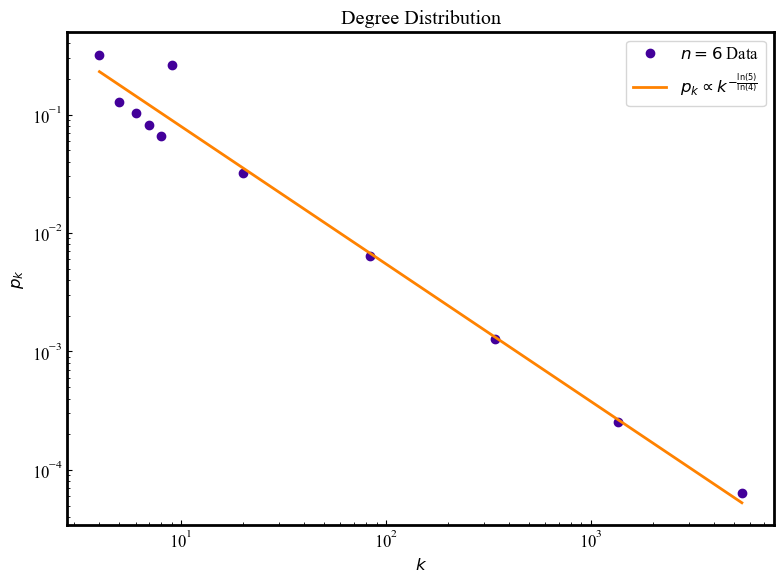

In [133]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(degrees, probabilities, 'o', color='#43009a', 
         markerfacecolor='#43009a', markeredgecolor='#43009a', label=r'$n = 6$ Data')
ax.plot(k_line, p_line, '-', color='#ff8200', linewidth=2, label=r'$p_k \propto k^{-\frac{\ln(5)}{\ln(4)}}$')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k$')
ax.set_title(f'Degree Distribution')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

plt.tight_layout()
plt.show()

In [83]:
clustering_dict = nx.clustering(G)

degree_clustering = {}
for node in G.nodes():
    deg = G.degree(node)
    clust = clustering_dict[node]
    if deg not in degree_clustering:
        degree_clustering[deg] = []
    degree_clustering[deg].append(clust)

degrees_ck = []
avg_clustering = []
for deg in sorted(degree_clustering.keys()):
    degrees_ck.append(deg)
    avg_clustering.append(np.mean(degree_clustering[deg]))

In [110]:
k_fit = np.array(degrees_ck[6:], dtype=float)
C_fit = np.array(avg_clustering[6:], dtype=float)

A = np.mean(C_fit * k_fit)

k_line = np.array(degrees_ck, dtype=float)
C_line = A * k_line**(-1)

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/1n/rqr82kgs60s4205zxs_lb3t00000gn/T/ipykernel_29974/3806042224.py:9: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(k_line, C_line, '-', color='#ff8200', linewidth=2, label=f'$C(k) \propto k^{{-1}}$')


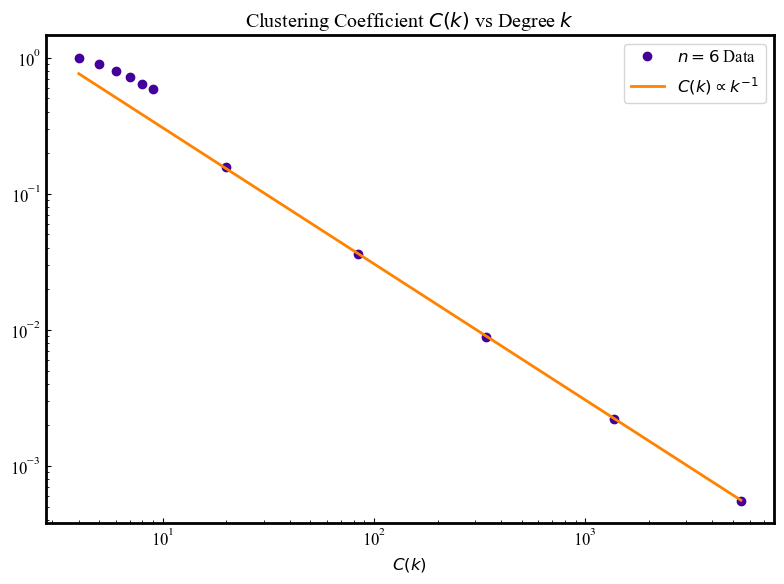

In [134]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(degrees_ck, avg_clustering, 'o', color='#43009a', 
         markerfacecolor='#43009a', markeredgecolor='#43009a', label=r'$n = 6$ Data')
ax.plot(k_line, C_line, '-', color='#ff8200', linewidth=2, label=f'$C(k) \propto k^{{-1}}$')
ax.set_xlabel(r'$k$')
ax.set_xlabel(r'$C(k)$')
ax.set_title(r'Clustering Coefficient $C(k)$ vs Degree $k$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

plt.tight_layout()
plt.show()

In [105]:
num_nodes = []
average_clustering_values = []

for n in range(3, 8):
    G_temp = build_hierarchical_network(n)
    num_nodes.append(G_temp.number_of_nodes())
    clust = nx.average_clustering(G_temp)
    average_clustering_values.append(clust)
    print(f"n={n}: N={G_temp.number_of_nodes()}, C={clust:.6f}")

n=3: N=125, C=0.850142
n=4: N=625, C=0.814990
n=5: N=3125, C=0.791582
n=6: N=15625, C=0.775978
n=6: N=15625, C=0.775978
n=7: N=78125, C=0.765492
n=7: N=78125, C=0.765492


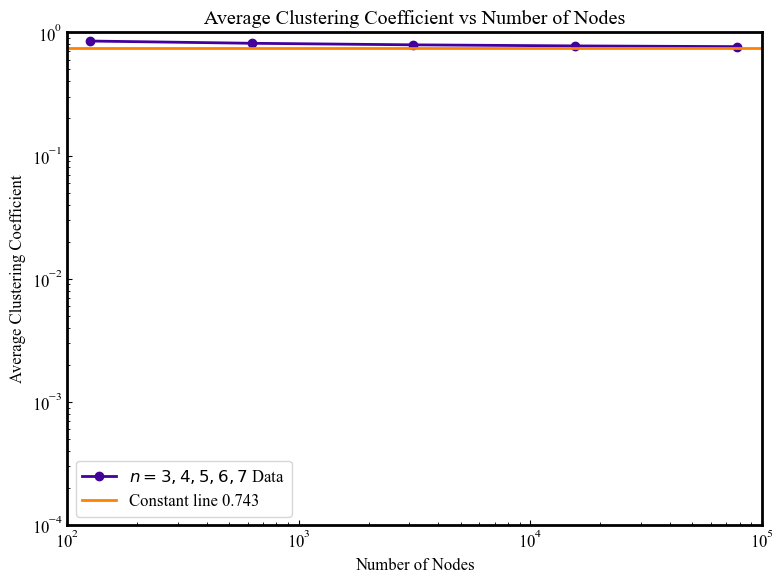

In [132]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(num_nodes, average_clustering_values, 'o-', color='#43009a', 
         markerfacecolor='#43009a', markeredgecolor='#43009a', linewidth=2, label=r'$n = 3,4,5,6,7$ Data')
ax.axhline(y=0.743, color='#ff8200', linestyle='-', linewidth=2, label='Constant line 0.743')
ax.set_xlabel(r'Number of Nodes')
ax.set_ylabel(r'Average Clustering Coefficient')
ax.set_title(r'Average Clustering Coefficient vs Number of Nodes')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e2, 1e5)
ax.set_ylim(1e-4, 1)
ax.legend()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

plt.tight_layout()
plt.show()

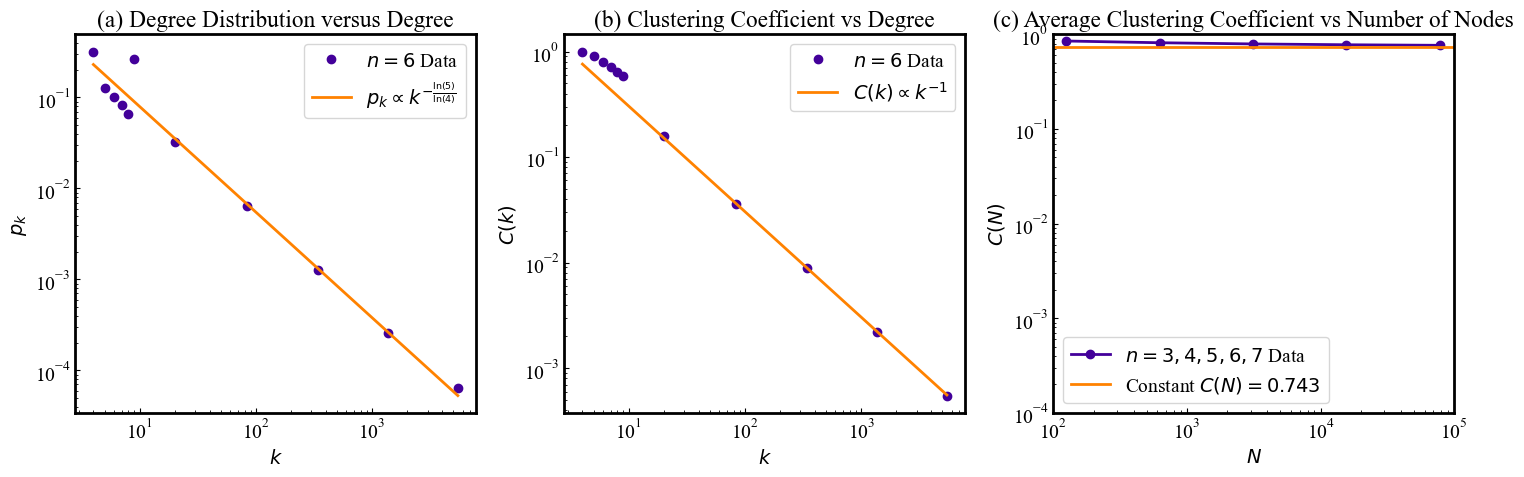

In [148]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(15, 5))



ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(degrees, probabilities, 'o', color='#43009a', 
         markerfacecolor='#43009a', markeredgecolor='#43009a', label=r'$n = 6$ Data')
ax1.plot(k_line, p_line, '-', color='#ff8200', linewidth=2, label=r'$p_k \propto k^{-\frac{\ln(5)}{\ln(4)}}$')
ax1.set_xlabel(r'$k$')
ax1.set_ylabel(r'$p_k$')
ax1.set_title('(a) Degree Distribution versus Degree')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
for spine in ax1.spines.values():
    spine.set_linewidth(2)
ax1.tick_params(direction='in', which='both')



ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(degrees_ck, avg_clustering, 'o', color='#43009a', 
         markerfacecolor='#43009a', markeredgecolor='#43009a', label=r'$n = 6$ Data')
ax2.plot(k_line, C_line, '-', color='#ff8200', linewidth=2, label=r'$C(k) \propto k^{-1}$')
ax2.set_xlabel(r'$k$')
ax2.set_ylabel(r'$C(k)$')
ax2.set_title(r'(b) Clustering Coefficient vs Degree')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()
for spine in ax2.spines.values():
    spine.set_linewidth(2)
ax2.tick_params(direction='in', which='both')



ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(num_nodes, average_clustering_values, 'o-', color='#43009a', 
         markerfacecolor='#43009a', markeredgecolor='#43009a', linewidth=2, label=r'$n = 3,4,5,6,7$ Data')
ax3.axhline(y=0.743, color='#ff8200', linestyle='-', linewidth=2, label=r'Constant $C(N) = 0.743$')
ax3.set_xlabel(r'$N$')
ax3.set_ylabel(r'$C(N)$')
ax3.set_title(r'(c) Average Clustering Coefficient vs Number of Nodes')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(1e2, 1e5)
ax3.set_ylim(1e-4, 1)
ax3.legend()
for spine in ax3.spines.values():
    spine.set_linewidth(2)
ax3.tick_params(direction='in', which='both')



plt.tight_layout()
plt.savefig('a3_problem_1.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

## Problem 2

In [151]:
G_hierarchical = build_hierarchical_network(6)

In [167]:
def get_giant_component_size(G):
    if G.number_of_nodes() == 0:
        return 0
    return len(max(nx.connected_components(G), key=len))

In [254]:
def evaluate_random_attack(G):

    G_temp = G.copy()

    N_max = G_temp.number_of_nodes()

    removal_quantity = [0]
    giant_component_sizes = [1]

    for iteration in tqdm(range(1, N_max + 1), desc="Random Attack"):

        chosen_node = np.random.choice(list(G_temp.nodes()))
        
        G_temp.remove_node(chosen_node)

        gc_size = get_giant_component_size(G_temp)

        removal_quantity.append(iteration / N_max)
        giant_component_sizes.append(gc_size / N_max)
    
    return removal_quantity, giant_component_sizes

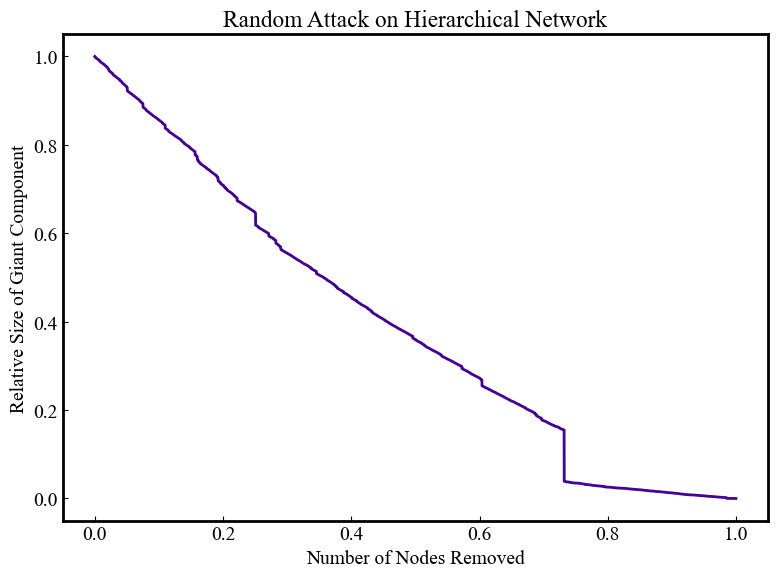

In [190]:
removal_quantity_random, giant_component_sizes_random = evaluate_random_attack(G_hierarchical)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(removal_quantity_random, giant_component_sizes_random, '-', color='#43009a', linewidth=2)
ax.set_xlabel(r'Number of Nodes Removed')
ax.set_ylabel(r'Relative Size of Giant Component')
ax.set_title('Random Attack on Hierarchical Network')
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

plt.tight_layout()
plt.show()

In [255]:
def evaluate_degree_attack(G):

    G_temp = G.copy()

    N_max = G_temp.number_of_nodes()

    removal_quantity = [0]
    giant_component_sizes = [1]

    for iteration in tqdm(range(1, N_max + 1), desc="Degree Attack"):

        degrees = dict(G_temp.degree())
        max_degree = max(degrees.values())
        candidates = [node for node, deg in degrees.items() if deg == max_degree]
        chosen_node = np.random.choice(candidates)
        
        G_temp.remove_node(chosen_node)

        gc_size = get_giant_component_size(G_temp)

        removal_quantity.append(iteration / N_max)
        giant_component_sizes.append(gc_size / N_max)
    
    return removal_quantity, giant_component_sizes

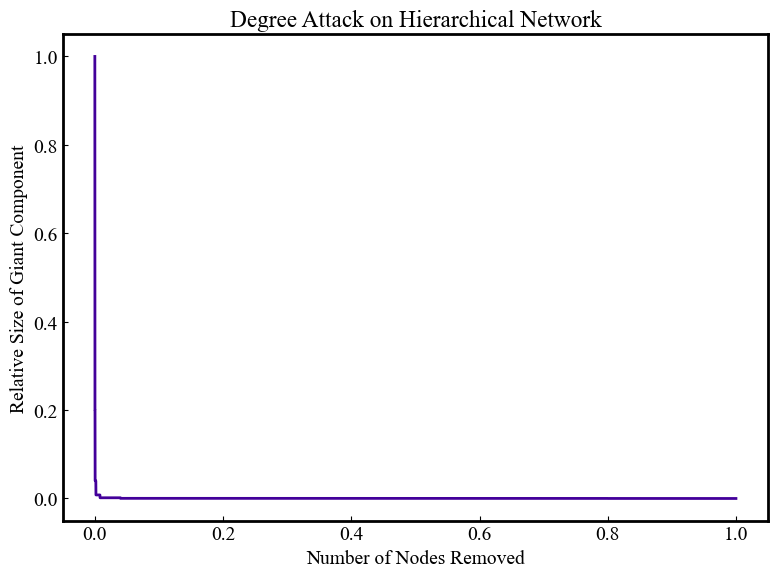

In [191]:
removal_quantity_degree_attack, giant_component_sizes_degree_attack = evaluate_degree_attack(G_hierarchical)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(removal_quantity_degree_attack, giant_component_sizes_degree_attack, '-', color='#43009a', linewidth=2)
ax.set_xlabel(r'Number of Nodes Removed')
ax.set_ylabel(r'Relative Size of Giant Component')
ax.set_title('Degree Attack on Hierarchical Network')
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

plt.tight_layout()
plt.show()

In [186]:
def evaluate_clustering_attack(G):

    G_temp = G.copy()

    N_max = G_temp.number_of_nodes()

    removal_quantity = [0.0]
    giant_component_sizes = [1.0]

    clustering_dict = nx.clustering(G_temp)

    for iteration in tqdm(range(1, N_max + 1), desc="Clustering Attack"):

        
        max_clust = max(clustering_dict.values())
        candidates = [n for n, c in clustering_dict.items() if c == max_clust]
        chosen_node = np.random.choice(candidates)

        neighbors = list(G_temp.neighbors(chosen_node))

        G_temp.remove_node(chosen_node)
        del clustering_dict[chosen_node]

        if neighbors:
            local_update = nx.clustering(G_temp, nodes=neighbors)
            clustering_dict.update(local_update)

        gc_size = get_giant_component_size(G_temp)

        removal_quantity.append(iteration / N_max)
        giant_component_sizes.append(gc_size / N_max)

    return removal_quantity, giant_component_sizes

In [193]:
removal_quantity_clustering_attack, giant_component_sizes_clustering_attack = evaluate_clustering_attack(G_hierarchical)

Clustering Attack: 100%|██████████| 15625/15625 [00:56<00:00, 275.94it/s] 


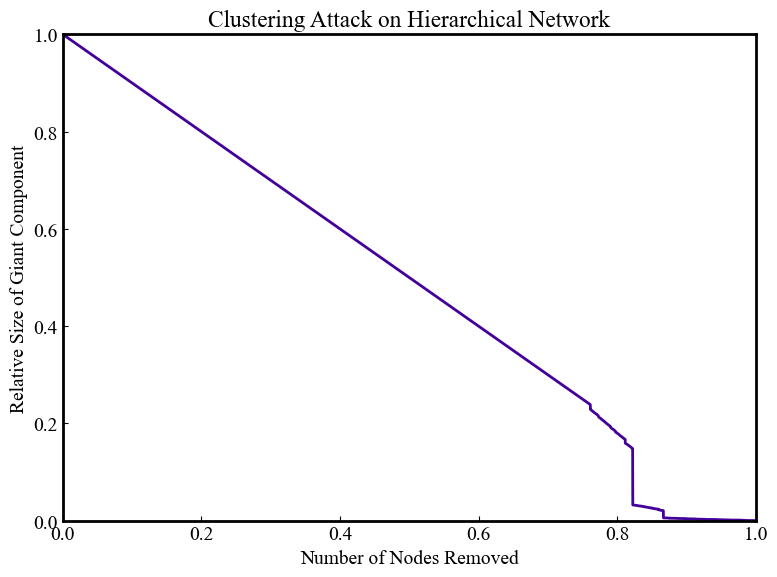

In [194]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(removal_quantity_clustering_attack, giant_component_sizes_clustering_attack, '-', color='#43009a', linewidth=2)
ax.set_xlabel(r'Number of Nodes Removed')
ax.set_ylabel(r'Relative Size of Giant Component')
ax.set_title('Clustering Attack on Hierarchical Network')
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

/var/folders/1n/rqr82kgs60s4205zxs_lb3t00000gn/T/ipykernel_29974/1197145595.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


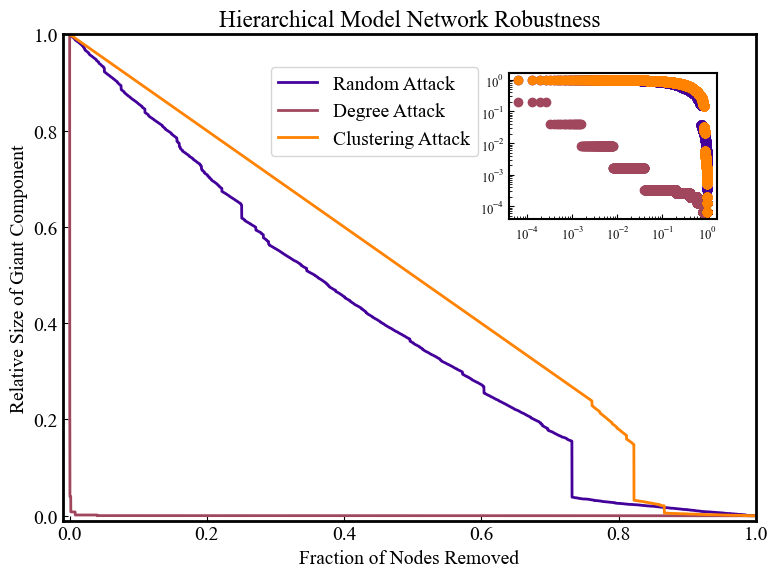

In [224]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(removal_quantity_random, giant_component_sizes_random, '-', color=colors[0], linewidth=2, label='Random Attack')
ax.plot(removal_quantity_degree_attack, giant_component_sizes_degree_attack, '-', color=colors[1], linewidth=2, label='Degree Attack')
ax.plot(removal_quantity_clustering_attack, giant_component_sizes_clustering_attack, '-', color=colors[2], linewidth=2, label='Clustering Attack')

ax.set_xlabel(r'Fraction of Nodes Removed')
ax.set_ylabel(r'Relative Size of Giant Component')
ax.set_title('Hierarchical Model Network Robustness')
ax.set_xlim(-0.01, 1)
ax.set_ylim(-0.01, 1)
ax.legend(loc=(0.3, 0.75))
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

# Inset ====================================================================================================================================
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right', borderpad=2)

ax_inset.plot(removal_quantity_random, giant_component_sizes_random, 'o', color=colors[0], linewidth=1.5)
ax_inset.plot(removal_quantity_degree_attack, giant_component_sizes_degree_attack, 'o', color=colors[1], linewidth=1.5)
ax_inset.plot(removal_quantity_clustering_attack, giant_component_sizes_clustering_attack, 'o', color=colors[2], linewidth=1.5)

ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
#ax_inset.set_xlabel('Fraction Removed', fontsize=10)
#ax_inset.set_ylabel('Giant Component', fontsize=10)
ax_inset.tick_params(labelsize=9, direction='in', which='both')
for spine in ax_inset.spines.values():
    spine.set_linewidth(1.5)

# Inset ====================================================================================================================================

plt.tight_layout()
plt.show()


In [240]:
def degree_from_uniform(u, gamma):
    return max(1, (1 - u)**(-1 / (gamma - 1)))

def generate_degree_sequence(num_nodes, gamma):
    uniform_randoms = np.random.uniform(0, 1, num_nodes)
    degree_sequence = [int(degree_from_uniform(u, gamma)) for u in uniform_randoms]
    
    total_degree = sum(degree_sequence)
    if total_degree % 2 != 0:
        degree_sequence[0] += 1
    
    return degree_sequence

def build_configurational_model(degree_sequence):
    G = nx.configuration_model(degree_sequence)
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    return G


In [246]:
degree_sequence = generate_degree_sequence(15625, gamma=2.5)
G_config = build_configurational_model(degree_sequence)

In [247]:
def CalcDegreeDistribution(G):
    degree_sequence = [degree for node, degree in G.degree()]
    degree_count = {}
    for degree in degree_sequence:
        degree_count[degree] = degree_count.get(degree, 0) + 1

    total_nodes = len(degree_sequence)
    degrees = sorted(degree_count.keys())
    probabilities = [degree_count[degree] / total_nodes for degree in degrees]
    
    return degrees, probabilities

def LogBinDegreeDistribution(degrees_input, probabilities_input, bin_base=2):
    max_degree = max(degrees_input)
    bin_edges = []
    edge = 1
    while edge <= max_degree:
        bin_edges.append(edge)
        edge *= bin_base

    binned_degrees = []
    binned_probabilities = []
    for i in range(len(bin_edges) - 1):
        bin_start = bin_edges[i]
        bin_end = bin_edges[i + 1]
        bin_degrees = [degree for degree in degrees_input if bin_start <= degree < bin_end]
        bin_probs = [probabilities_input[degrees_input.index(degree)] for degree in bin_degrees]

        if bin_degrees:
            middle_degree_position = (bin_end + bin_start)/2
            bin_range = bin_end - bin_start
            avg_probability = sum(bin_probs) / bin_range
            binned_degrees.append(middle_degree_position)
            binned_probabilities.append(avg_probability)

    return binned_degrees, binned_probabilities

In [248]:
degrees, probabilities = CalcDegreeDistribution(G_config)
bin_base_size = np.pow(10, 1/10)
binned_degrees, binned_probabilities = LogBinDegreeDistribution(degrees, probabilities, bin_base=bin_base_size)


log_degrees = [np.log10(d) if d > 0 else np.nan for d in degrees]
log_probs = [np.log10(p) if p > 0 else np.nan for p in probabilities]
log_binned_degrees = [np.log10(d) if d > 0 else np.nan for d in binned_degrees]
log_binned_probabilities = [np.log10(p) if p > 0 else np.nan for p in binned_probabilities]


x = np.array(log_binned_degrees)
y = np.array(log_binned_probabilities)
fit_range = (0.5, 2.5)
mask = (~np.isnan(x)) & (~np.isnan(y)) & (x >= fit_range[0]) & (x <= fit_range[1])
x_fit = x[mask]
y_fit = y[mask]
slope, intercept, r_value, p_value, std_err = linregress(x_fit, y_fit)
fit_x = np.linspace(fit_range[0], fit_range[1], 100)
fit_y = slope * fit_x + intercept

print(f"Fitted gamma: {-slope:.3f}")


Fitted gamma: 2.524


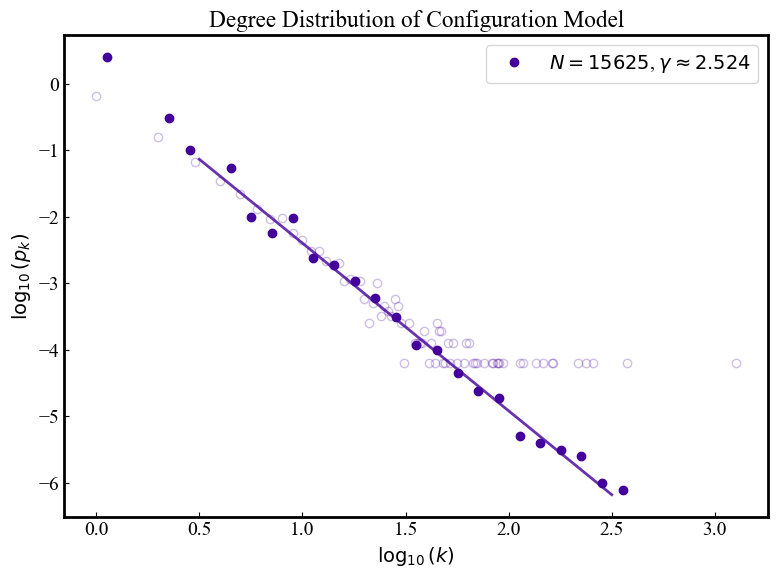

In [253]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)


ax.plot(log_degrees, log_probs, color=colors[0], marker="o", linestyle='None', 
        markerfacecolor='none', markeredgecolor=colors[0], alpha=0.25)


config_number_of_nodes = G_config.number_of_nodes()

ax.plot(log_binned_degrees, log_binned_probabilities, color=colors[0], marker="o", 
        linestyle='None', markerfacecolor=colors[0], markeredgecolor=colors[0], 
        alpha=1, label=fr'$N = {config_number_of_nodes}$, $\gamma \approx {-slope:.3f}$')


ax.plot(fit_x, fit_y, color=colors[0], linestyle='-', linewidth=2, alpha=0.8)

ax.set_title("Degree Distribution of Configuration Model")
ax.set_ylabel(r"$\log_{10}(p_{k})$")
ax.set_xlabel(r"$\log_{10}(k)$")
ax.legend()

for spine in ax.spines.values():
    spine.set_linewidth(2)

ax.tick_params(direction='in', which='both')

plt.tight_layout()


plt.savefig('a3_problem_2_a_1.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


In [256]:
config_removal_quantity_random, config_giant_component_sizes_random = evaluate_random_attack(G_config)

Random Attack: 100%|██████████| 15625/15625 [00:40<00:00, 384.30it/s] 


In [257]:
config_removal_quantity_degree, config_giant_component_sizes_degree = evaluate_degree_attack(G_config)

Degree Attack: 100%|██████████| 15625/15625 [00:54<00:00, 286.79it/s] 


In [258]:
config_removal_quantity_clustering, config_giant_component_sizes_clustering = evaluate_clustering_attack(G_config)

Clustering Attack: 100%|██████████| 15625/15625 [00:43<00:00, 358.22it/s] 


/var/folders/1n/rqr82kgs60s4205zxs_lb3t00000gn/T/ipykernel_29974/315947458.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


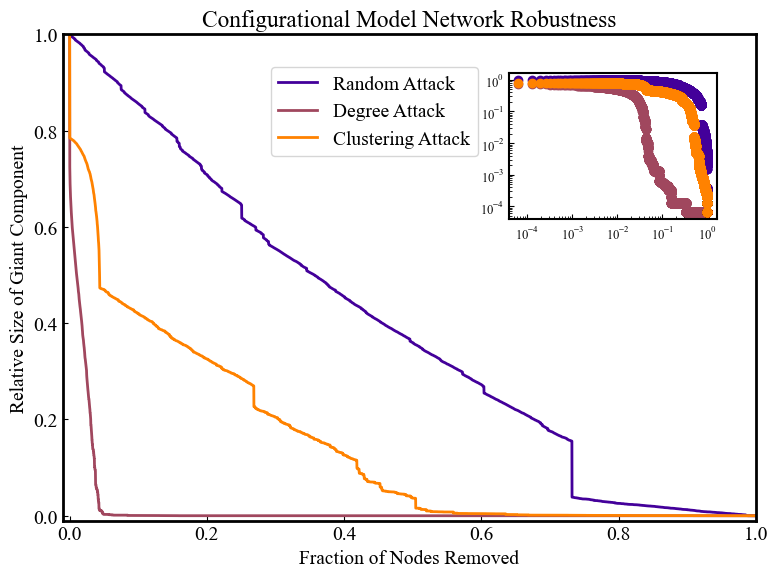

In [262]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(config_removal_quantity_random, giant_component_sizes_random, '-', color=colors[0], linewidth=2, label='Random Attack')
ax.plot(config_removal_quantity_degree, config_giant_component_sizes_degree, '-', color=colors[1], linewidth=2, label='Degree Attack')
ax.plot(config_removal_quantity_clustering, config_giant_component_sizes_clustering, '-', color=colors[2], linewidth=2, label='Clustering Attack')

ax.set_xlabel(r'Fraction of Nodes Removed')
ax.set_ylabel(r'Relative Size of Giant Component')
ax.set_title('Configurational Model Network Robustness')
ax.set_xlim(-0.01, 1)
ax.set_ylim(-0.01, 1)
ax.legend(loc=(0.3, 0.75))
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

# Inset ====================================================================================================================================
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right', borderpad=2)

ax_inset.plot(config_removal_quantity_random, giant_component_sizes_random, 'o', color=colors[0], linewidth=1.5)
ax_inset.plot(config_removal_quantity_degree, config_giant_component_sizes_degree, 'o', color=colors[1], linewidth=1.5)
ax_inset.plot(config_removal_quantity_clustering, config_giant_component_sizes_clustering, 'o', color=colors[2], linewidth=1.5)

ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
#ax_inset.set_xlabel('Fraction Removed', fontsize=10)
#ax_inset.set_ylabel('Giant Component', fontsize=10)
ax_inset.tick_params(labelsize=9, direction='in', which='both')
for spine in ax_inset.spines.values():
    spine.set_linewidth(1.5)

# Inset ====================================================================================================================================

plt.tight_layout()
plt.show()


/var/folders/1n/rqr82kgs60s4205zxs_lb3t00000gn/T/ipykernel_29974/3410014074.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


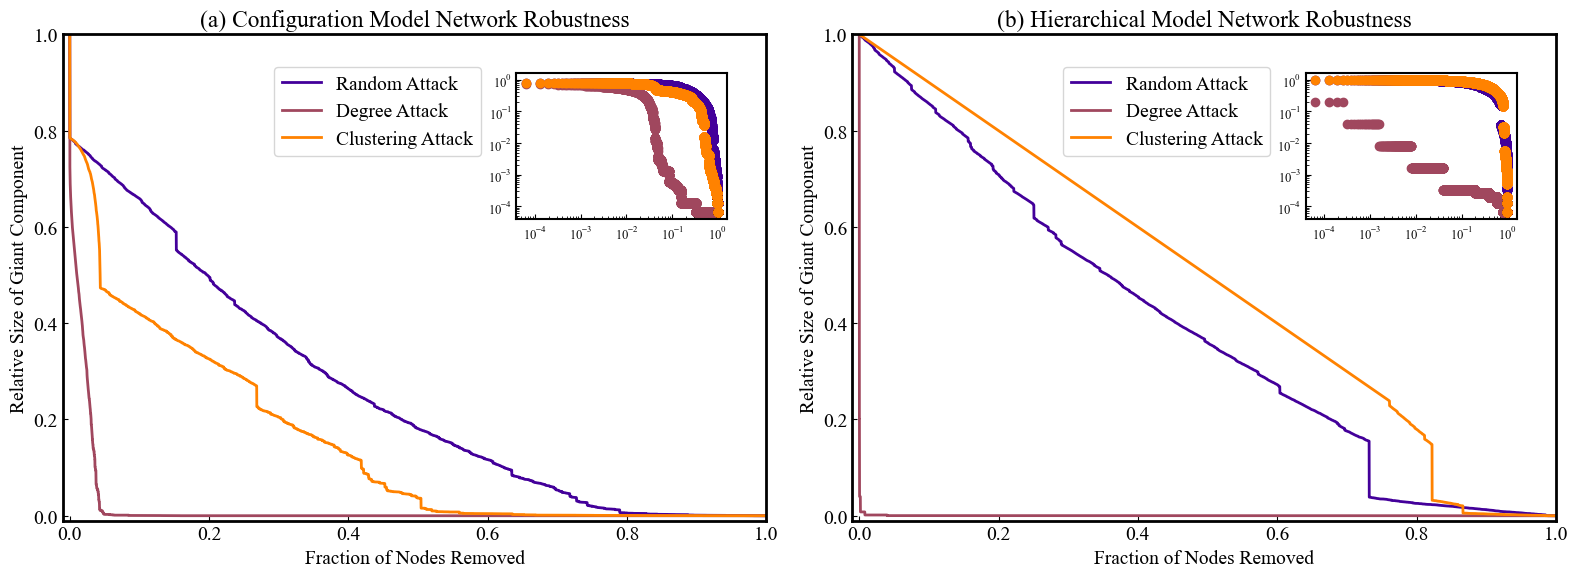

In [264]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(16, 6))

# Left plot - Configuration Model
ax1 = fig.add_subplot(1, 2, 1)

ax1.plot(config_removal_quantity_random, config_giant_component_sizes_random, '-', color=colors[0], linewidth=2, label='Random Attack')
ax1.plot(config_removal_quantity_degree, config_giant_component_sizes_degree, '-', color=colors[1], linewidth=2, label='Degree Attack')
ax1.plot(config_removal_quantity_clustering, config_giant_component_sizes_clustering, '-', color=colors[2], linewidth=2, label='Clustering Attack')

ax1.set_xlabel(r'Fraction of Nodes Removed')
ax1.set_ylabel(r'Relative Size of Giant Component')
ax1.set_title('(a) Configuration Model Network Robustness')
ax1.set_xlim(-0.01, 1)
ax1.set_ylim(-0.01, 1)
ax1.legend(loc=(0.3, 0.75))
for spine in ax1.spines.values():
    spine.set_linewidth(2)
ax1.tick_params(direction='in', which='both')

# Inset for config model
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax1_inset = inset_axes(ax1, width="30%", height="30%", loc='upper right', borderpad=2)

ax1_inset.plot(config_removal_quantity_random, config_giant_component_sizes_random, 'o', color=colors[0], linewidth=1.5)
ax1_inset.plot(config_removal_quantity_degree, config_giant_component_sizes_degree, 'o', color=colors[1], linewidth=1.5)
ax1_inset.plot(config_removal_quantity_clustering, config_giant_component_sizes_clustering, 'o', color=colors[2], linewidth=1.5)

ax1_inset.set_xscale('log')
ax1_inset.set_yscale('log')
ax1_inset.tick_params(labelsize=9, direction='in', which='both')
for spine in ax1_inset.spines.values():
    spine.set_linewidth(1.5)

# Right plot - Hierarchical Model
ax2 = fig.add_subplot(1, 2, 2)

ax2.plot(removal_quantity_random, giant_component_sizes_random, '-', color=colors[0], linewidth=2, label='Random Attack')
ax2.plot(removal_quantity_degree_attack, giant_component_sizes_degree_attack, '-', color=colors[1], linewidth=2, label='Degree Attack')
ax2.plot(removal_quantity_clustering_attack, giant_component_sizes_clustering_attack, '-', color=colors[2], linewidth=2, label='Clustering Attack')

ax2.set_xlabel(r'Fraction of Nodes Removed')
ax2.set_ylabel(r'Relative Size of Giant Component')
ax2.set_title('(b) Hierarchical Model Network Robustness')
ax2.set_xlim(-0.01, 1)
ax2.set_ylim(-0.01, 1)
ax2.legend(loc=(0.3, 0.75))
for spine in ax2.spines.values():
    spine.set_linewidth(2)
ax2.tick_params(direction='in', which='both')

# Inset for hierarchical model
ax2_inset = inset_axes(ax2, width="30%", height="30%", loc='upper right', borderpad=2)

ax2_inset.plot(removal_quantity_random, giant_component_sizes_random, 'o', color=colors[0], linewidth=1.5)
ax2_inset.plot(removal_quantity_degree_attack, giant_component_sizes_degree_attack, 'o', color=colors[1], linewidth=1.5)
ax2_inset.plot(removal_quantity_clustering_attack, giant_component_sizes_clustering_attack, 'o', color=colors[2], linewidth=1.5)

ax2_inset.set_xscale('log')
ax2_inset.set_yscale('log')
ax2_inset.tick_params(labelsize=9, direction='in', which='both')
for spine in ax2_inset.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.savefig('a3_problem_2_ab.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


## Problem 3

In [265]:
G_BA_3 = nx.barabasi_albert_graph(10000, 2)

In [ ]:
degree_sum = 0
degree_squared_sum = 0
N_nodes = G_BA_3.number_of_nodes()

for node in G_BA_3.nodes():
    degree = G_BA_3.degree(node)
    degree_sum += degree
    degree_squared_sum += degree ** 2

k_average = degree_sum / N_nodes
k_squared_average = degree_squared_sum / N_nodes

lambda_c_SIS = k_average / k_squared_average
lambda_c_SIR = 1 / ( (k_squared_average / k_average) - 1 )

print(lambda_c_SIS)
print(lambda_c_SIR)

0.07007141705739296
0.07535139616384672


In [273]:
def simulate_SIS(G, initial_infected_count, beta, mu, MCS_Max):
    
    N = G.number_of_nodes()
    
    all_nodes = list(G.nodes())

    infected = set(np.random.choice(all_nodes, size=initial_infected_count, replace=False))
    
    times_all = []
    infected_fraction_over_time_all = []

    times_MCS = []
    infected_fraction_over_time_MCS = []

    times_all.append(0)
    infected_fraction_over_time_all.append(len(infected) / N)

    times_MCS.append(0)
    infected_fraction_over_time_MCS.append(len(infected) / N)

    
    for MCS in tqdm(range(1, MCS_Max+1), desc="SIS Simulation"):

        for _ in range(N):

            chosen_node = np.random.choice(all_nodes)

            if chosen_node in infected:

                if np.random.random() < mu:

                    infected.remove(chosen_node)

            else:

                neighbors = list(G.neighbors(chosen_node))

                infected_neighbors = []

                for neighbor in neighbors:
                    if neighbor in infected:
                        infected_neighbors.append(neighbor)

                for infected_neighbor in infected_neighbors:
                    if np.random.random() < beta:
                        infected.add(chosen_node)
                        break
                
            times_all.append((MCS - 1) + (_ + 1) / N)
            infected_fraction = len(infected) / N
            infected_fraction_over_time_all.append(infected_fraction)
        
        times_MCS.append(MCS)
        infected_fraction_over_time_MCS.append(len(infected) / N)
    
    return times_all , infected_fraction_over_time_all , times_MCS , infected_fraction_over_time_MCS

In [312]:
initial_infected = 1000
beta = 0.2
MCS_Max = 50

mu_critical = beta / lambda_c_SIS

print(mu_critical)

2.854230846169234


In [333]:
lambda_values = [0.002, 0.01, 0.05, lambda_c_SIS, 0.1, 0.5, 2.5]
mu_values = [beta / lam for lam in lambda_values]
print(mu_values)


[100.0, 20.0, 4.0, 2.854230846169234, 2.0, 0.4, 0.08]


In [334]:
results = {}
for mu in mu_values:
    print(f"Running SIS simulation with mu = {mu}...")
    times_all, infected_fraction_all, times_MCS, infected_fraction_MCS = simulate_SIS(G_BA_3, initial_infected, beta, mu, MCS_Max)
    results[mu] = (times_all, infected_fraction_all, times_MCS, infected_fraction_MCS)


Running SIS simulation with mu = 100.0...


SIS Simulation: 100%|██████████| 50/50 [02:02<00:00,  2.45s/it]



Running SIS simulation with mu = 20.0...


SIS Simulation: 100%|██████████| 50/50 [02:06<00:00,  2.53s/it]


Running SIS simulation with mu = 4.0...


SIS Simulation: 100%|██████████| 50/50 [02:04<00:00,  2.49s/it]


Running SIS simulation with mu = 2.854230846169234...


SIS Simulation: 100%|██████████| 50/50 [02:05<00:00,  2.51s/it]


Running SIS simulation with mu = 2.0...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]


Running SIS simulation with mu = 0.4...


SIS Simulation: 100%|██████████| 50/50 [02:06<00:00,  2.53s/it]


Running SIS simulation with mu = 0.08...


SIS Simulation: 100%|██████████| 50/50 [02:04<00:00,  2.49s/it]


In [335]:
steady_state_averages = {}
for mu in mu_values:
    times_all, infected_fraction_all, times_MCS, infected_fraction_MCS = results[mu]
    # Find values after MCS 20 (after thermalization)
    values_after_20 = [infected_fraction_MCS[i] for i, t in enumerate(times_MCS) if t > 20]
    if values_after_20:
        steady_state_averages[mu] = np.mean(values_after_20)
    else:
        steady_state_averages[mu] = infected_fraction_MCS[-1]

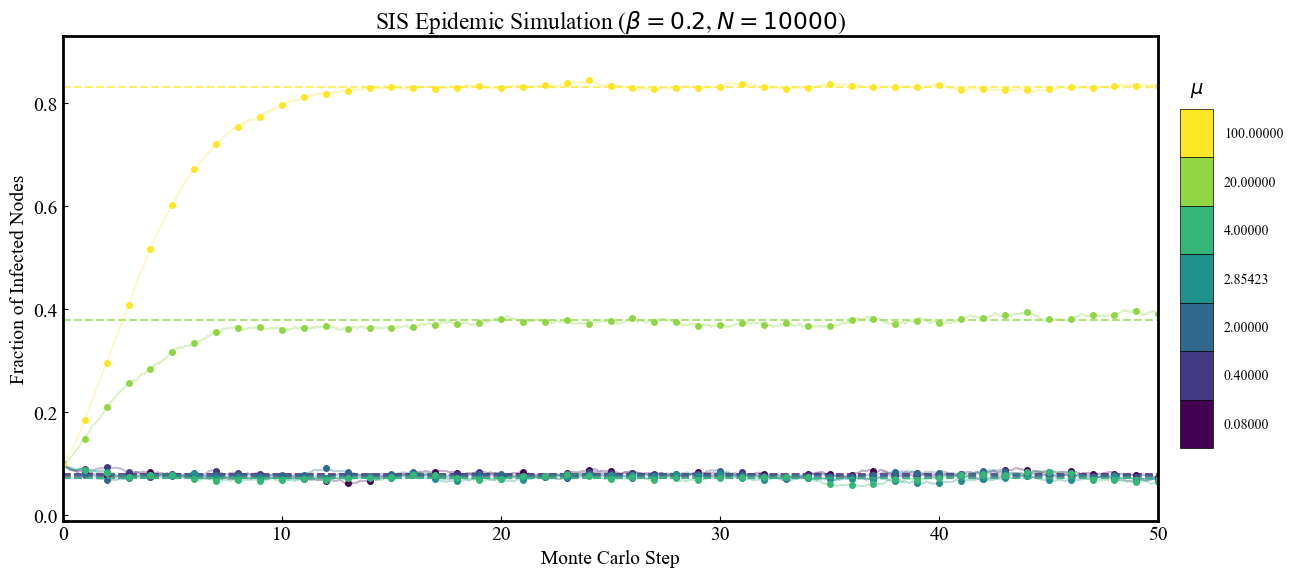

In [380]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

plot_colors = cm.viridis(np.linspace(0, 1, len(mu_values)))

for i, mu in enumerate(mu_values):
    times_all, infected_fraction_all, times_MCS, infected_fraction_MCS = results[mu]
    
    ax.plot(times_all, infected_fraction_all, '-', color=plot_colors[i], linewidth=1, alpha=0.3)
    
    ax.plot(times_MCS, infected_fraction_MCS, 'o', color=plot_colors[i], 
            markerfacecolor=plot_colors[i], markeredgecolor=plot_colors[i],
            markersize=4)
    
    ax.axhline(y=steady_state_averages[mu], color=plot_colors[i], linestyle='--', linewidth=1.5, alpha=0.7)


ax.set_xlabel(r'Monte Carlo Step')
ax.set_ylabel(r'Fraction of Infected Nodes')
ax.set_title(fr'SIS Epidemic Simulation ($\beta = {beta}$, $N = {G_BA_3.number_of_nodes()}$)')
ax.set_xlim(0, MCS_Max)
ax.set_ylim(-0.01, max([max(results[mu][3]) for mu in mu_values]) * 1.1)

for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

# Position for the colorbar (right side)
cbar_x = 1.02
cbar_y = 0.15
cbar_width = 0.03
cbar_height = 0.7

# Add title above colorbar
fig.text(cbar_x + cbar_width/2, cbar_y + cbar_height + 0.02, r'$\mu$', 
         ha='center', va='bottom', fontsize=14, transform=ax.transAxes)

# Create rectangles for each mu value (reversed order: high to low, top to bottom)
rect_height = cbar_height / len(mu_values)
for i, mu in enumerate(reversed(mu_values)):
    rect_y = cbar_y + i * rect_height
    rect = Rectangle((cbar_x, rect_y), cbar_width, rect_height, 
                      transform=ax.transAxes, facecolor=plot_colors[i], 
                      edgecolor='black', linewidth=0.5)
    fig.add_artist(rect)
    
    # Add mu value label on the right of the rectangle
    fig.text(cbar_x + cbar_width + 0.01, rect_y + rect_height/2, 
             f'{mu:.5f}', ha='left', va='center', fontsize=10, 
             transform=ax.transAxes)

plt.tight_layout()
plt.savefig('a3_problem_3_b_1.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


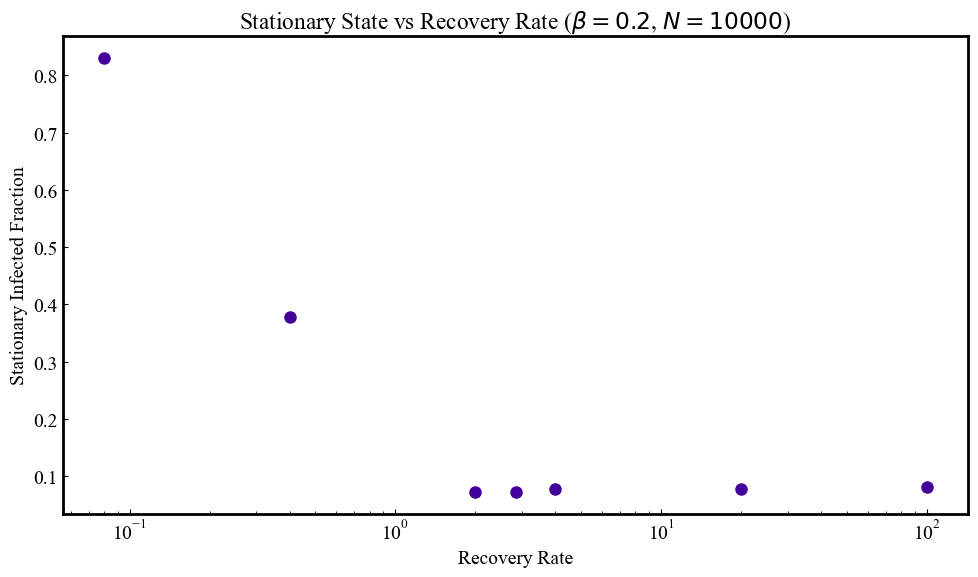

In [364]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

mu_list = list(mu_values)
steady_state_list = [steady_state_averages[mu] for mu in mu_list]

ax.plot(mu_list, steady_state_list, 'o', color='#43009a', 
        markerfacecolor='#43009a', markeredgecolor='#43009a',
        markersize=8, linewidth=2)

ax.set_xlabel(r'Recovery Rate')
ax.set_ylabel(r'Stationary Infected Fraction')
ax.set_title(fr'Stationary State vs Recovery Rate ($\beta = {beta}$, $N = {G_BA_3.number_of_nodes()}$)')

ax.set_xscale('log')

for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

plt.tight_layout()
plt.savefig('a3_problem_3_b_2.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


In [369]:
def simulate_SIS_vaccinated(G, initial_infected_count, vaccinated_fraction, beta, mu, MCS_Max):
    
    N = G.number_of_nodes()
    
    all_nodes = list(G.nodes())

    vaccinated_ammount = int( np.floor(N * vaccinated_fraction) )
    vaccinated_nodes = set(np.random.choice(all_nodes, size=vaccinated_ammount, replace=False))

    infectable_nodes = [node for node in all_nodes if node not in vaccinated_nodes]

    infected = set(np.random.choice(infectable_nodes, size=initial_infected_count, replace=False))
    
    times_all = []
    infected_fraction_over_time_all = []

    times_MCS = []
    infected_fraction_over_time_MCS = []

    times_all.append(0)
    infected_fraction_over_time_all.append(len(infected) / N)

    times_MCS.append(0)
    infected_fraction_over_time_MCS.append(len(infected) / N)

    
    for MCS in tqdm(range(1, MCS_Max+1), desc="SIS Simulation"):

        for _ in range(N):

            chosen_node = np.random.choice(all_nodes)

            if chosen_node in infected:

                if np.random.random() < mu:

                    infected.remove(chosen_node)

            else:

                if chosen_node not in vaccinated_nodes:

                    neighbors = list(G.neighbors(chosen_node))

                    infected_neighbors = []

                    for neighbor in neighbors:
                        if neighbor in infected:
                            infected_neighbors.append(neighbor)

                    for infected_neighbor in infected_neighbors:
                        if np.random.random() < beta:
                            infected.add(chosen_node)
                            break
                
            times_all.append((MCS - 1) + (_ + 1) / N)
            infected_fraction = len(infected) / N
            infected_fraction_over_time_all.append(infected_fraction)
        
        times_MCS.append(MCS)
        infected_fraction_over_time_MCS.append(len(infected) / N)
    
    return times_all , infected_fraction_over_time_all , times_MCS , infected_fraction_over_time_MCS

In [370]:
beta_vacc = 0.2
mu_vacc = 0.2
MCS_Max_vacc = 50
initial_infected_vacc = 1000

vaccination_levels = [0.0, 0.1, 0.3, 0.5, 0.7]

In [371]:
vaccination_results = {}

for vacc_frac in vaccination_levels:
    print(f"\nRunning simulation with {vacc_frac*100:.0f}% vaccination...")
    
    times_all, infected_fraction_all, times_MCS, infected_fraction_MCS = simulate_SIS_vaccinated(
        G_BA_3, initial_infected_vacc, vacc_frac, beta_vacc, mu_vacc, MCS_Max_vacc
    )
    
    vaccination_results[vacc_frac] = (times_all, infected_fraction_all, times_MCS, infected_fraction_MCS)


Running simulation with 0% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:03<00:00,  2.47s/it]



Running simulation with 10% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:04<00:00,  2.49s/it]



Running simulation with 30% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:04<00:00,  2.49s/it]



Running simulation with 50% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:03<00:00,  2.48s/it]



Running simulation with 70% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:03<00:00,  2.48s/it]


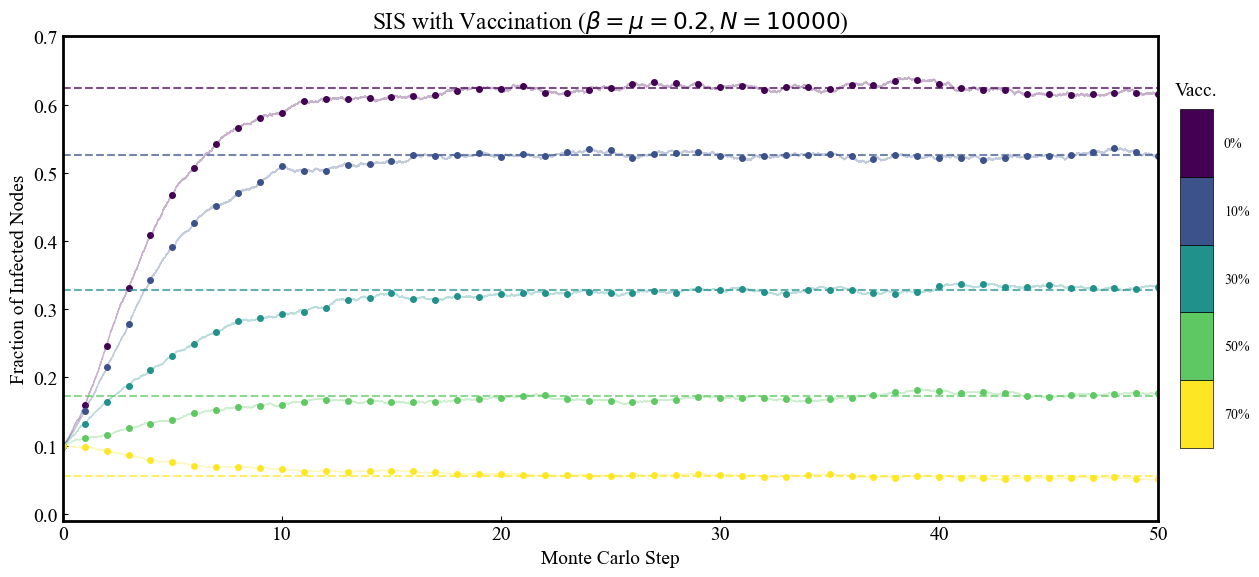

In [395]:
# Calculate steady state averages for vaccination results
vaccination_steady_states = {}
for vacc_frac in vaccination_levels:
    times_all, infected_fraction_all, times_MCS, infected_fraction_MCS = vaccination_results[vacc_frac]
    values_after_20 = [infected_fraction_MCS[i] for i, t in enumerate(times_MCS) if t > 20]
    if values_after_20:
        vaccination_steady_states[vacc_frac] = np.mean(values_after_20)
    else:
        vaccination_steady_states[vacc_frac] = infected_fraction_MCS[-1]

# Plotting
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

plot_colors_vacc = cm.viridis(np.linspace(0, 1, len(vaccination_levels)))

for i, vacc_frac in enumerate(vaccination_levels):
    times_all, infected_fraction_all, times_MCS, infected_fraction_MCS = vaccination_results[vacc_frac]
    
    ax.plot(times_all, infected_fraction_all, '-', color=plot_colors_vacc[i], linewidth=1, alpha=0.3)
    
    ax.plot(times_MCS, infected_fraction_MCS, 'o', color=plot_colors_vacc[i], 
            markerfacecolor=plot_colors_vacc[i], markeredgecolor=plot_colors_vacc[i],
            markersize=4)
    
    ax.axhline(y=vaccination_steady_states[vacc_frac], color=plot_colors_vacc[i], 
               linestyle='--', linewidth=1.5, alpha=0.7)

ax.set_xlabel(r'Monte Carlo Step')
ax.set_ylabel(r'Fraction of Infected Nodes')
ax.set_title(fr'SIS with Vaccination ($\beta = \mu = {beta_vacc}$, $N = {G_BA_3.number_of_nodes()}$)')
ax.set_xlim(0, MCS_Max_vacc)
ax.set_ylim(-0.01, max([max(vaccination_results[v][3]) for v in vaccination_levels]) * 1.1)

for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

# Create colorbar-style legend on the right
from matplotlib.patches import Rectangle

cbar_x = 1.02
cbar_y = 0.15
cbar_width = 0.03
cbar_height = 0.7

fig.text(cbar_x + cbar_width/2, cbar_y + cbar_height + 0.02, r'Vacc.', 
         ha='center', va='bottom', fontsize=14, transform=ax.transAxes)

rect_height = cbar_height / len(vaccination_levels)
for i, vacc_frac in enumerate(vaccination_levels):
    rect_y = cbar_y + i * rect_height
    # Reverse color index so yellow (high vacc) is at bottom
    reversed_idx = len(vaccination_levels) - 1 - i
    rect = Rectangle((cbar_x, rect_y), cbar_width, rect_height, 
                      transform=ax.transAxes, facecolor=plot_colors_vacc[reversed_idx], 
                      edgecolor='black', linewidth=0.5)
    fig.add_artist(rect)
    
    # Use same reversed index for labels
    fig.text(cbar_x + cbar_width + 0.01, rect_y + rect_height/2, 
             f'{vaccination_levels[reversed_idx]*100:.0f}%', ha='left', va='center', fontsize=10, 
             transform=ax.transAxes)

plt.tight_layout()
plt.savefig('a3_problem_3_c.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [385]:
def simulate_SIS_vaccinated_focused(G, initial_infected_count, vaccinated_fraction, beta, mu, MCS_Max):
    
    N = G.number_of_nodes()
    
    all_nodes = list(G.nodes())

    vaccinated_ammount = int( np.floor(N * vaccinated_fraction) )
    vaccinated_nodes = set()
    
    edges_list = list(G.edges())

    for trial in range(vaccinated_ammount):

        while True:
            edge_idx = np.random.choice(len(edges_list))
            chosen_edge = edges_list[edge_idx]
            node_a, node_b = chosen_edge
            if np.random.random() < 0.5:
                node_to_vaccinate = node_a
            else:
                node_to_vaccinate = node_b
            
            if node_to_vaccinate not in vaccinated_nodes:
                vaccinated_nodes.add(node_to_vaccinate)
                break

    infectable_nodes = [node for node in all_nodes if node not in vaccinated_nodes]

    infected = set(np.random.choice(infectable_nodes, size=initial_infected_count, replace=False))
    
    times_all = []
    infected_fraction_over_time_all = []

    times_MCS = []
    infected_fraction_over_time_MCS = []

    times_all.append(0)
    infected_fraction_over_time_all.append(len(infected) / N)

    times_MCS.append(0)
    infected_fraction_over_time_MCS.append(len(infected) / N)

    
    for MCS in tqdm(range(1, MCS_Max+1), desc="SIS Simulation"):

        for _ in range(N):

            chosen_node = np.random.choice(all_nodes)

            if chosen_node in infected:

                if np.random.random() < mu:

                    infected.remove(chosen_node)

            else:

                if chosen_node not in vaccinated_nodes:

                    neighbors = list(G.neighbors(chosen_node))

                    infected_neighbors = []

                    for neighbor in neighbors:
                        if neighbor in infected:
                            infected_neighbors.append(neighbor)

                    for infected_neighbor in infected_neighbors:
                        if np.random.random() < beta:
                            infected.add(chosen_node)
                            break
                
            times_all.append((MCS - 1) + (_ + 1) / N)
            infected_fraction = len(infected) / N
            infected_fraction_over_time_all.append(infected_fraction)
        
        times_MCS.append(MCS)
        infected_fraction_over_time_MCS.append(len(infected) / N)
    
    return times_all , infected_fraction_over_time_all , times_MCS , infected_fraction_over_time_MCS

In [386]:
beta_vacc_focus = 0.2
mu_vacc_focus = 0.2
MCS_Max_vacc_focus = 50
initial_infected_vacc_focus = 1000

vaccination_levels_focus = [0.0, 0.1, 0.3, 0.5, 0.7]

In [387]:
vaccination_results_focus = {}

for vacc_frac_focus in vaccination_levels_focus:
    print(f"\nRunning simulation with {vacc_frac_focus*100:.0f}% vaccination...")
    
    times_all, infected_fraction_all, times_MCS, infected_fraction_MCS = simulate_SIS_vaccinated_focused(
        G_BA_3, initial_infected_vacc_focus, vacc_frac_focus, beta_vacc_focus, mu_vacc_focus, MCS_Max_vacc_focus
    )
    
    vaccination_results_focus[vacc_frac_focus] = (times_all, infected_fraction_all, times_MCS, infected_fraction_MCS)


Running simulation with 0% vaccination...



Running simulation with 0% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]




Running simulation with 0% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]




Running simulation with 10% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.42s/it]




Running simulation with 0% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]




Running simulation with 10% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.42s/it]




Running simulation with 30% vaccination...



Running simulation with 0% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]




Running simulation with 10% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.42s/it]




Running simulation with 30% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:00<00:00,  2.42s/it]




Running simulation with 0% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]




Running simulation with 10% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.42s/it]




Running simulation with 30% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:00<00:00,  2.42s/it]




Running simulation with 50% vaccination...



Running simulation with 0% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]




Running simulation with 10% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.42s/it]




Running simulation with 30% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:00<00:00,  2.42s/it]




Running simulation with 50% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:00<00:00,  2.42s/it]




Running simulation with 0% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]




Running simulation with 10% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.42s/it]




Running simulation with 30% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:00<00:00,  2.42s/it]




Running simulation with 50% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:00<00:00,  2.42s/it]




Running simulation with 70% vaccination...



Running simulation with 0% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]




Running simulation with 10% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.42s/it]




Running simulation with 30% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:00<00:00,  2.42s/it]




Running simulation with 50% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:00<00:00,  2.42s/it]




Running simulation with 70% vaccination...


SIS Simulation: 100%|██████████| 50/50 [02:01<00:00,  2.43s/it]


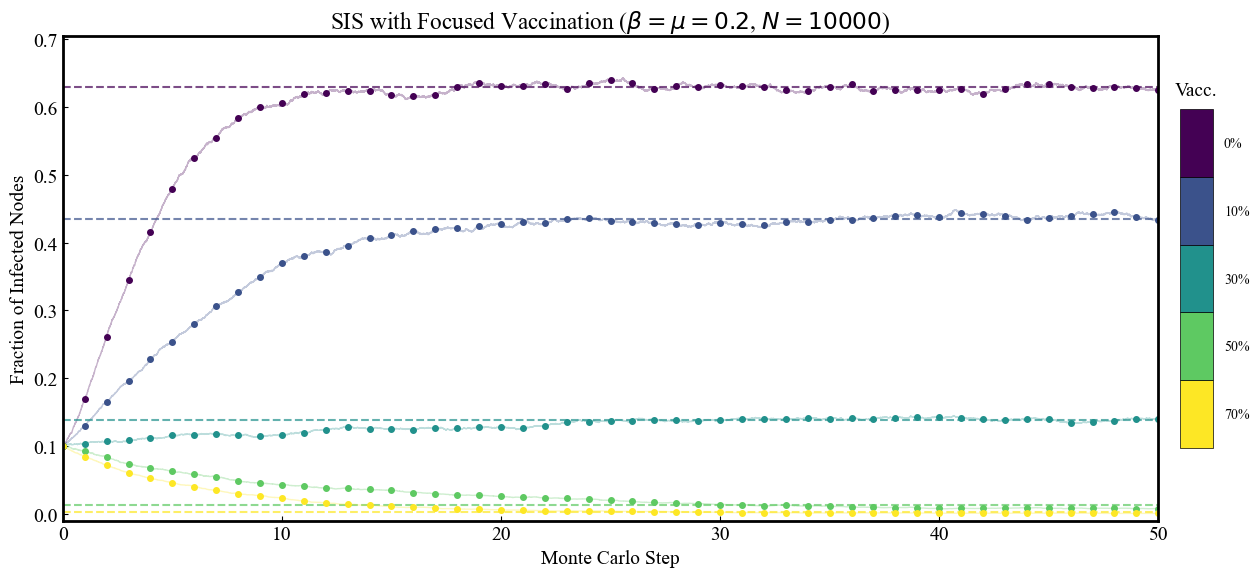

In [397]:
# Calculate steady state averages for vaccination results
vaccination_steady_states_focus = {}
for vacc_frac_focus in vaccination_levels_focus:
    times_all, infected_fraction_all, times_MCS, infected_fraction_MCS = vaccination_results_focus[vacc_frac_focus]
    values_after_20 = [infected_fraction_MCS[i] for i, t in enumerate(times_MCS) if t > 20]
    if values_after_20:
        vaccination_steady_states_focus[vacc_frac_focus] = np.mean(values_after_20)
    else:
        vaccination_steady_states_focus[vacc_frac_focus] = infected_fraction_MCS[-1]

# Plotting
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

plot_colors_vacc = cm.viridis(np.linspace(0, 1, len(vaccination_levels_focus)))

for i, vacc_frac_focus in enumerate(vaccination_levels_focus):
    times_all, infected_fraction_all, times_MCS, infected_fraction_MCS = vaccination_results_focus[vacc_frac_focus]
    
    ax.plot(times_all, infected_fraction_all, '-', color=plot_colors_vacc[i], linewidth=1, alpha=0.3)
    
    ax.plot(times_MCS, infected_fraction_MCS, 'o', color=plot_colors_vacc[i], 
            markerfacecolor=plot_colors_vacc[i], markeredgecolor=plot_colors_vacc[i],
            markersize=4)
    
    ax.axhline(y=vaccination_steady_states_focus[vacc_frac_focus], color=plot_colors_vacc[i], 
               linestyle='--', linewidth=1.5, alpha=0.7)

ax.set_xlabel(r'Monte Carlo Step')
ax.set_ylabel(r'Fraction of Infected Nodes')
ax.set_title(fr'SIS with Focused Vaccination ($\beta = \mu = {beta_vacc_focus}$, $N = {G_BA_3.number_of_nodes()}$)')
ax.set_xlim(0, MCS_Max_vacc_focus)
ax.set_ylim(-0.01, max([max(vaccination_results_focus[v][3]) for v in vaccination_levels_focus]) * 1.1)

for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

# Create colorbar-style legend on the right
from matplotlib.patches import Rectangle

cbar_x = 1.02
cbar_y = 0.15
cbar_width = 0.03
cbar_height = 0.7

fig.text(cbar_x + cbar_width/2, cbar_y + cbar_height + 0.02, r'Vacc.', 
         ha='center', va='bottom', fontsize=14, transform=ax.transAxes)

rect_height = cbar_height / len(vaccination_levels_focus)
for i, vacc_frac_focus in enumerate(vaccination_levels_focus):
    rect_y = cbar_y + i * rect_height
    # Reverse color index so yellow (high vacc) is at bottom
    reversed_idx = len(vaccination_levels_focus) - 1 - i
    rect = Rectangle((cbar_x, rect_y), cbar_width, rect_height, 
                      transform=ax.transAxes, facecolor=plot_colors_vacc[reversed_idx], 
                      edgecolor='black', linewidth=0.5)
    fig.add_artist(rect)
    
    # Use same reversed index for labels
    fig.text(cbar_x + cbar_width + 0.01, rect_y + rect_height/2, 
             f'{vaccination_levels_focus[reversed_idx]*100:.0f}%', ha='left', va='center', fontsize=10, 
             transform=ax.transAxes)

plt.tight_layout()
plt.savefig('a3_problem_3_d_1.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

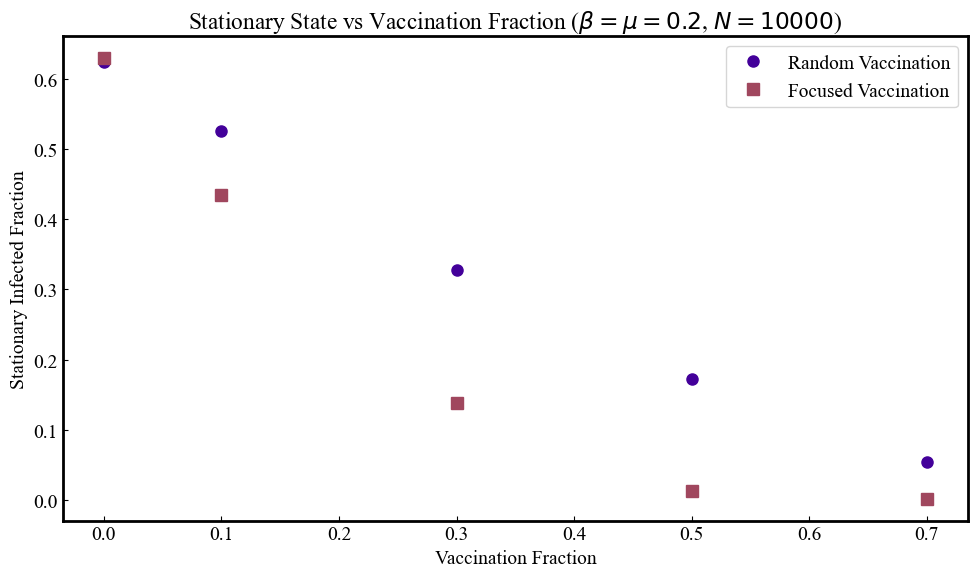

In [399]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Random vaccination
vacc_list_random = list(vaccination_levels)
steady_state_list_random = [vaccination_steady_states[v] for v in vacc_list_random]

# Focused vaccination
vacc_list_focus = list(vaccination_levels_focus)
steady_state_list_focus = [vaccination_steady_states_focus[v] for v in vacc_list_focus]

ax.plot(vacc_list_random, steady_state_list_random, 'o', color=colors[0], 
        markerfacecolor=colors[0], markeredgecolor=colors[0],
        markersize=8, linewidth=2, label='Random Vaccination')

ax.plot(vacc_list_focus, steady_state_list_focus, 's', color=colors[1], 
        markerfacecolor=colors[1], markeredgecolor=colors[1],
        markersize=8, linewidth=2, label='Focused Vaccination')

ax.set_xlabel(r'Vaccination Fraction')
ax.set_ylabel(r'Stationary Infected Fraction')
ax.set_title(fr'Stationary State vs Vaccination Fraction ($\beta = \mu = {beta_vacc}$, $N = {G_BA_3.number_of_nodes()}$)')

ax.legend()

for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(direction='in', which='both')

plt.tight_layout()
plt.savefig('a3_problem_3_cd_comparison.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()